L'obiettivo di questo esercizio è generare un set di dati di autogenerati
utilizzando le Lib., analizzarli con pandas e visualizzare i risultati
usando Matplotlib. Gli studenti dovranno eseguire le seguenti operazioni:



 -Generazione dei Dati:
 
  Utilizzare NumPy per generare una serie temporale
di 365 giorni di dati, simulando il numero di visitatori giornalieri in
un ospedale. Assumere che il numero medio di visitatori sia 1200 con una
deviazione standard di 900. Inoltre, aggiungere un trend decrescente nel
tempo per simulare l'aumento della popolarità del parco.

 -Creazione del DataFrame:

  Creare un DataFrame pandas con le date come
indice e il numero di visitatori come colonna e una collonna casuale
della patologia scelta fra 3(ossa, cuore, testa ).

 -Analisi dei Dati:
 
  Calcolare il numero medio di visitatori per mese e la
deviazione standard e quale patologia è più e quale meno trovata.

 -Visualizzazione dei Dati:

    . Creare un grafico a linee del numero di visitatori giornalieri.

    . Aggiungere al grafico la media mobile a 7 giorni per mostrare la tendenza settimanale.

    . Creare un secondo grafico che mostri la media mensile dei visitatori.
    
    . Creare un grafico che mostri la divisione fra le 3 patologie

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


In [168]:

# Creazione dei dati dei visitatori con un trend decrescente
date = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

visitatori_casuali = np.round(np.random.normal(loc=1200, scale=900, size=366)).astype(int)

trend = np.linspace(0, 500, 366)

visitatori_giornalieri = visitatori_casuali - trend
visitatori_giornalieri = np.maximum(visitatori_giornalieri, 0)  # Impedisce che i visitatori siano negativi

colonna_patologie = []
patologie = ["ossa", "cuore", "testa"]

for visitatori in visitatori_giornalieri:
    visitatori = int(visitatori)
    
    if visitatori > 0:
       
        colonna_patologie_giornaliere = [np.random.choice(patologie) for _ in range(visitatori)]
        patologia_piu_comune = Counter(colonna_patologie_giornaliere).most_common(1)[0][0]
    else:
        
        patologia_piu_comune = np.nan
    
    
    colonna_patologie.append(patologia_piu_comune)

# Creazione del DataFrame
df = pd.DataFrame({
    'Data': date,
    'Numero_Visitatori': visitatori_giornalieri,
    'Patologia': colonna_patologie
})

# Visualizzare le prime righe del DataFrame
print(df.head())


        Data  Numero_Visitatori Patologia
0 2024-01-01        2298.000000      ossa
1 2024-01-02         736.630137     testa
2 2024-01-03         683.260274      ossa
3 2024-01-04         112.890411     cuore
4 2024-01-05         694.520548      ossa


In [169]:
df.isnull().sum()

Data                  0
Numero_Visitatori     0
Patologia            51
dtype: int64

In [170]:
df['Patologia'] = df['Patologia'].fillna(method='ffill')
df['Patologia'] = df['Patologia'].fillna(np.random.choice(patologie))


C:\Users\stefano\AppData\Local\Temp\ipykernel_10548\4224452923.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Patologia'] = df['Patologia'].fillna(method='ffill')


In [171]:
df.isnull().sum()

Data                 0
Numero_Visitatori    0
Patologia            0
dtype: int64

In [172]:
df['Mese'] = df['Data'].dt.month

In [173]:
visitatori_mensili = df.groupby('Mese')['Numero_Visitatori'].mean().reset_index()

In [174]:
patologie_count = df['Patologia'].value_counts()
# La patologia più comune è quella con il conteggio maggiore
patologia_piu_comune = patologie_count.idxmax()

# La patologia meno comune è quella con il conteggio minore
patologia_meno_comune = patologie_count.idxmin()

print("Numero medio di visitatori per mese:")
print(visitatori_mensili)

print("\nPatologia più comune:", patologia_piu_comune)
print("Patologia meno comune:", patologia_meno_comune)

Numero medio di visitatori per mese:
    Mese  Numero_Visitatori
0      1        1077.742377
1      2        1242.791686
2      3         928.711887
3      4        1088.941553
4      5         996.640742
5      6         946.720091
6      7         906.220946
7      8         629.081308
8      9         894.533333
9     10         736.824569
10    11        1068.863014
11    12         802.483429

Patologia più comune: cuore
Patologia meno comune: testa


C:\Users\stefano\AppData\Local\Temp\ipykernel_10548\1167816408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visitatori_mensili, x='Mese', y='Numero_Visitatori', palette='viridis')


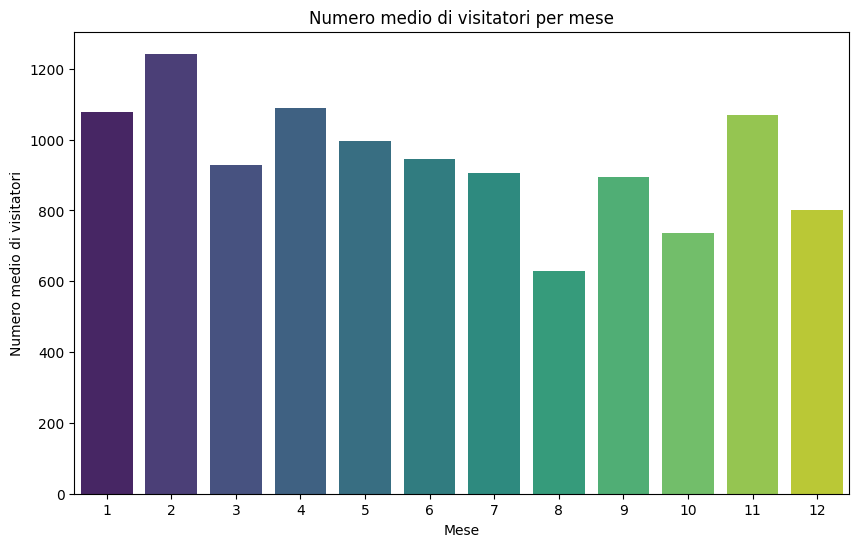

In [175]:
#Plot del numero medio di visitatori per mese
plt.figure(figsize=(10, 6))
sns.barplot(data=visitatori_mensili, x='Mese', y='Numero_Visitatori', palette='viridis')
plt.title('Numero medio di visitatori per mese')
plt.xlabel('Mese')
plt.ylabel('Numero medio di visitatori')
plt.show()

In [176]:
df.head()

,Data,Numero_Visitatori,Patologia,Mese
0,2024-01-01,2298.000000,ossa,1
1,2024-01-02,736.630137,testa,1
2,2024-01-03,683.260274,ossa,1
3,2024-01-04,112.890411,cuore,1
4,2024-01-05,694.520548,ossa,1


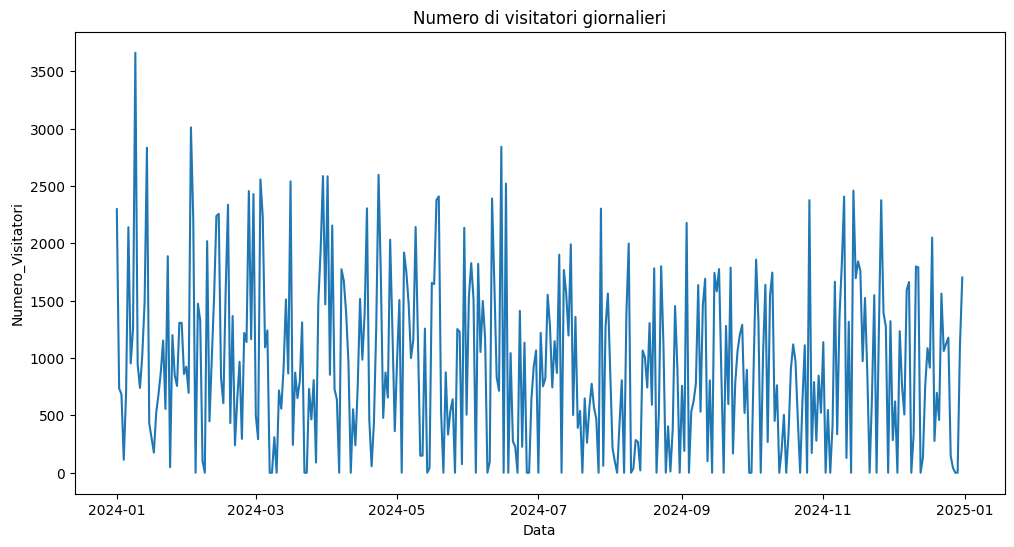

In [177]:
#Plot del numero di visitatori giornalieri
plt.figure(figsize=(12, 6))
sns.lineplot(x='Data', y='Numero_Visitatori', data=df)
plt.title('Numero di visitatori giornalieri')
plt.show()

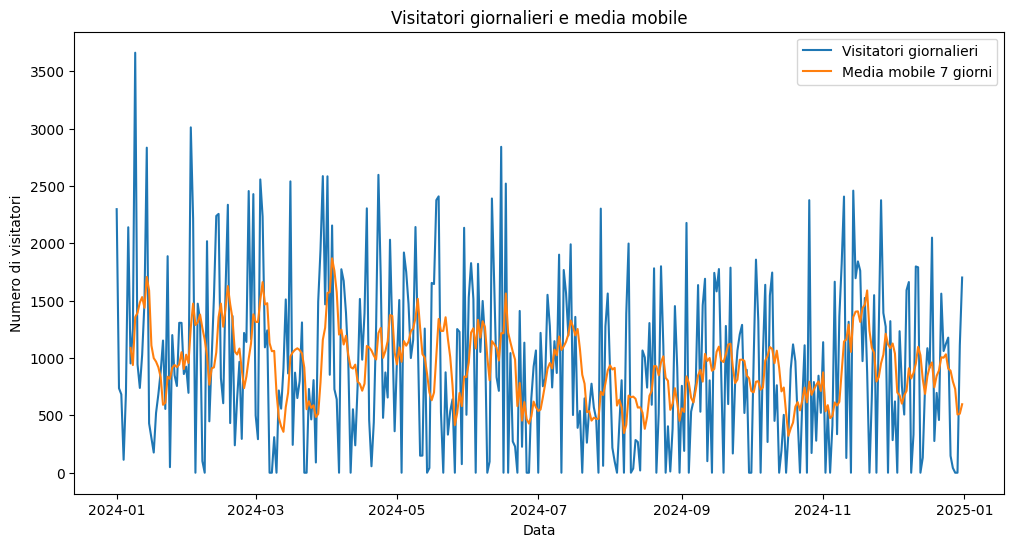

In [178]:
df['media_mobile_7giorni'] = df['Numero_Visitatori'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Numero_Visitatori'], label='Visitatori giornalieri')
plt.plot(df['Data'], df['media_mobile_7giorni'], label='Media mobile 7 giorni')
plt.xlabel('Data')
plt.ylabel('Numero di visitatori')
plt.title('Visitatori giornalieri e media mobile')
plt.legend()
plt.show()

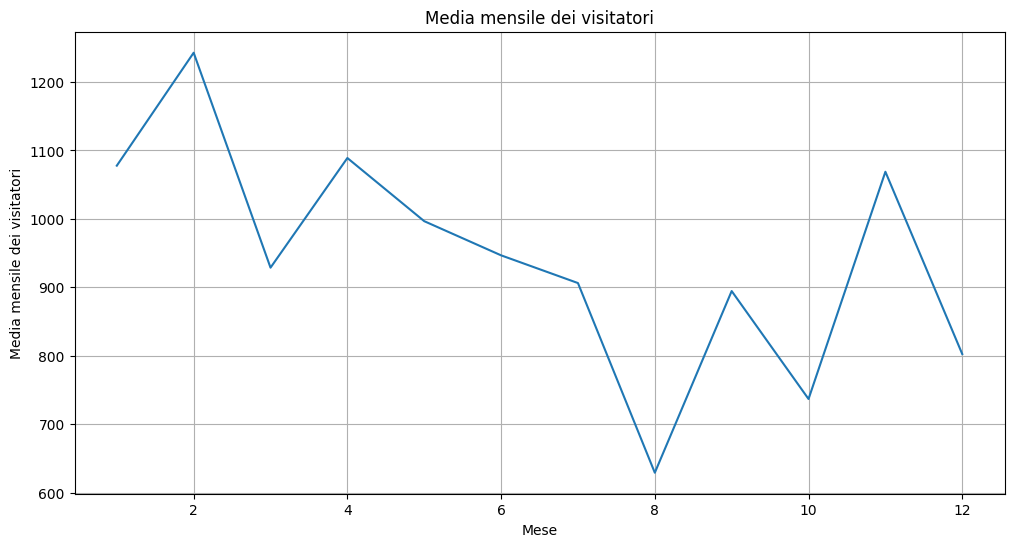

In [179]:
media_mensile = df.groupby('Mese')['Numero_Visitatori'].mean()

# Visualizza il grafico della media mensile
plt.figure(figsize=(12, 6))
plt.plot(media_mensile.index, media_mensile.values)
plt.xlabel('Mese')
plt.ylabel('Media mensile dei visitatori')
plt.title('Media mensile dei visitatori')
plt.grid(True)
plt.show()

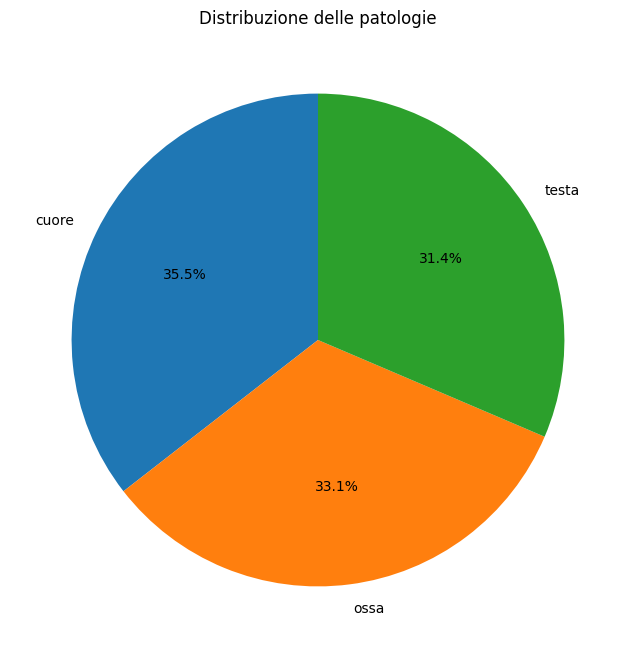

In [193]:
conteggio_patologie = df['Patologia'].value_counts()

# Creazione del grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(conteggio_patologie, labels=conteggio_patologie.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione delle patologie')
plt.show()

In [181]:
df.drop(["Mese","media_mobile_7giorni"], axis = 1, inplace = True)

In [182]:
df.head()

,Data,Numero_Visitatori,Patologia
0,2024-01-01,2298.000000,ossa
1,2024-01-02,736.630137,testa
2,2024-01-03,683.260274,ossa
3,2024-01-04,112.890411,cuore
4,2024-01-05,694.520548,ossa


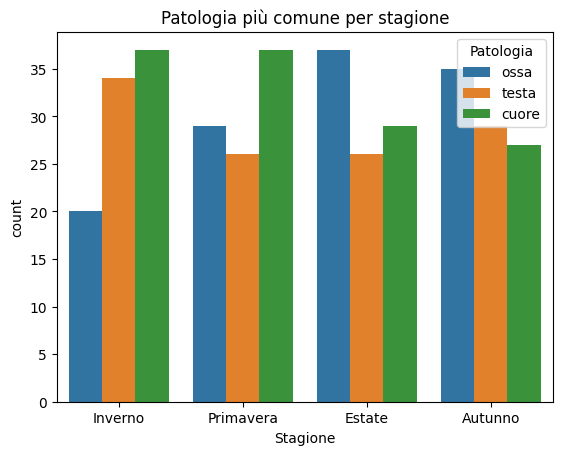

In [191]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Estate'
    elif month in [9, 10, 11]:
        return 'Autunno'
    else:
        return 'Inverno'

df['Stagione'] = df['Data'].dt.month.apply(get_season)

# Patologia più comune per ogni mese e stagione
patologie_per_mese = df.groupby(['Data', 'Stagione'])['Patologia'].agg(lambda x: x.value_counts().index[0]).reset_index()


sns.countplot(x='Stagione', hue='Patologia', data=patologie_per_mese)
plt.title('Patologia più comune per stagione')
plt.show()